In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn import preprocessing 

import warnings 
warnings.filterwarnings("ignore")

2025-05-03 14:13:17.239160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746281597.489925      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746281597.569682      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.boston_housing.load_data()

xtrain = preprocessing.normalize(xtrain)
xtest = preprocessing.normalize(xtest)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [4]:
model = Sequential ()
model.add(Dense(128, activation= "relu", input_shape= (xtrain.shape[1],)))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(1))

model.compile(loss="mse", optimizer = "rmsprop", metrics=["mae"])

2025-05-03 14:13:34.972362: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
history= model.fit(xtrain,ytrain, epochs= 100, batch_size=1, verbose=1, validation_data= (xtest, ytest))

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 243.9339 - mae: 11.6608 - val_loss: 68.8595 - val_mae: 5.9961
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.3297 - mae: 6.3032 - val_loss: 61.8906 - val_mae: 5.6946
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62.6596 - mae: 5.6339 - val_loss: 58.4691 - val_mae: 5.5404
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58.7326 - mae: 5.3667 - val_loss: 55.8858 - val_mae: 5.6178
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68.2003 - mae: 5.7989 - val_loss: 55.6491 - val_mae: 5.6923
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.5496 - mae: 5.2228 - val_loss: 53.7788 - val_mae: 5.3158
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53.0751 - mae: 4.9936 - val_loss: 64.1780 - val_mae: 5.5865
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42.0883 - mae: 4.5361 - val_loss: 52.4657 - val_mae: 5.1452
Epoch 9/100
404/404 ━━━━━━━━━━

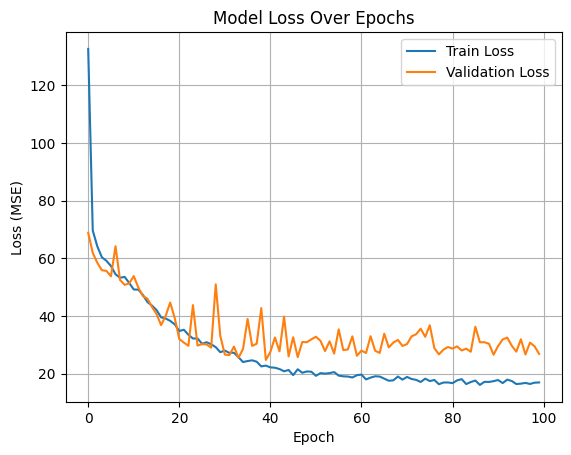

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
test_loss, test_mae= model.evaluate(xtest, ytest)

test_loss, test_mae

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.1090 - mae: 3.2059  


(26.861072540283203, 3.4570348262786865)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


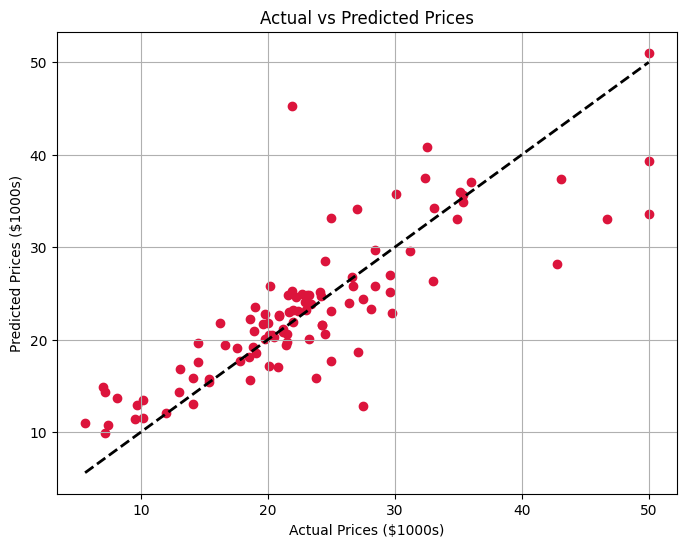

In [8]:
# Predict on test data
Y_pred = model.predict(xtest).flatten()

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(ytest, Y_pred, c='crimson')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

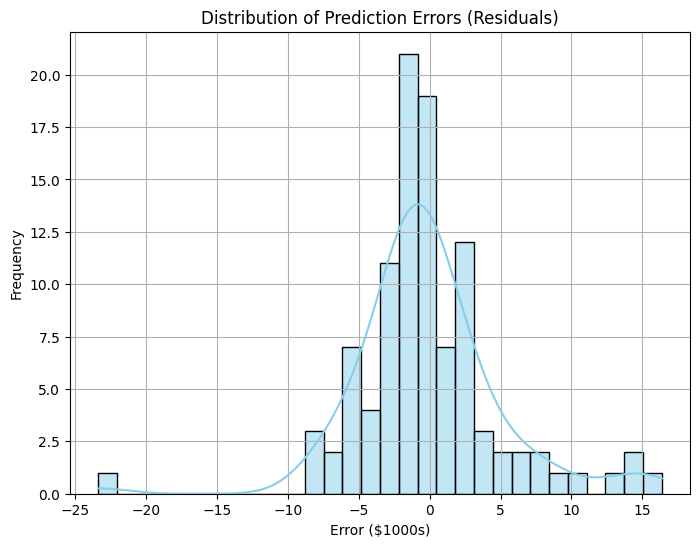

In [9]:
import seaborn as sns

# Residuals
residuals = ytest - Y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Error ($1000s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

exp 2


In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset, keeping only the top 10,000 most frequent words
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform length
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
model = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5203 - loss: 0.6911 - val_accuracy: 0.5516 - val_loss: 0.6870
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7266 - loss: 0.5540 - val_accuracy: 0.8150 - val_loss: 0.4012
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8978 - loss: 0.2582 - val_accuracy: 0.8658 - val_loss: 0.3097
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9473 - loss: 0.1641 - val_accuracy: 0.8584 - val_loss: 0.3354
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9749 - loss: 0.1028 - val_accuracy: 0.8712 - val_loss: 0.3125
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9874 - loss: 0.0653 - val_accuracy: 0.8746 - val_loss: 0.3161
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9963 - loss: 0.0343 - val_accuracy: 0.8734 - val_loss: 0.3329
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9982 - loss: 0.0229 - val_accuracy: 0.8726 - v

In [13]:
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8695 - loss: 0.3761
Test Loss: 0.3824723958969116
Test Accuracy: 0.8689600229263306


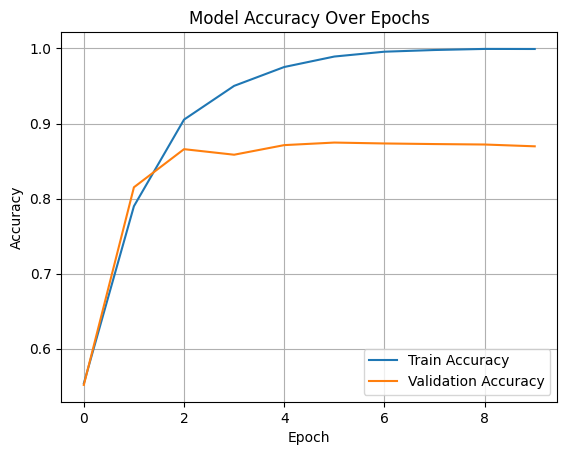

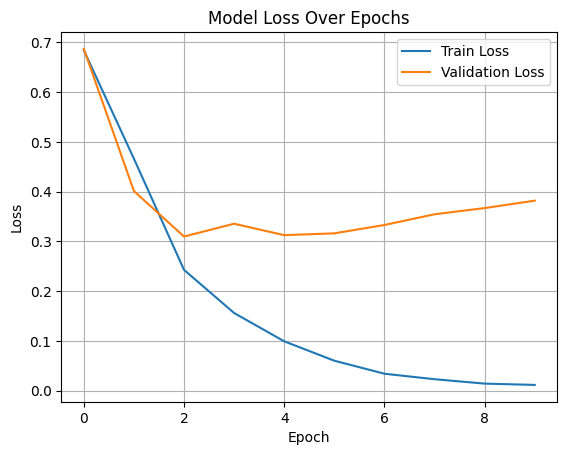

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

exp3


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.7447 - loss: 0.7116 - val_accuracy: 0.8621 - val_loss: 0.3773
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8767 - loss: 0.3356 - val_accuracy: 0.8738 - val_loss: 0.3447
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8965 - loss: 0.2829 - val_accuracy: 0.8875 - val_loss: 0.3023
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9066 - loss: 0.2519 - val_accuracy: 0.8985 - val_loss: 0.2752
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9194 - loss: 0.2193 - val_accuracy: 0.9069 - val_loss: 0.2672
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9239 - loss: 0.2035 - val_accuracy: 0.9013 - val_loss: 0.2738
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9321 - loss: 0.1801 - val_accuracy: 0.9053 - val_loss: 0.2592
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9367 -

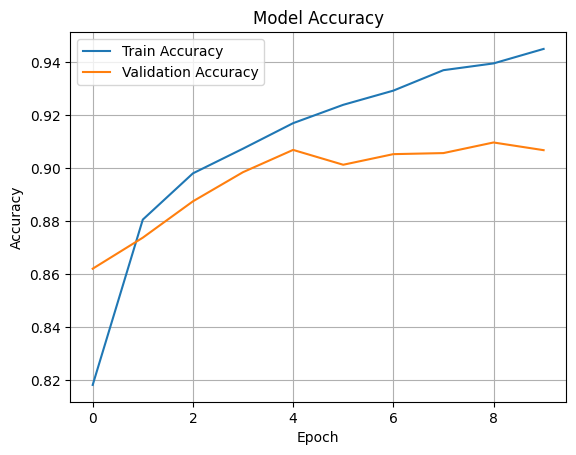

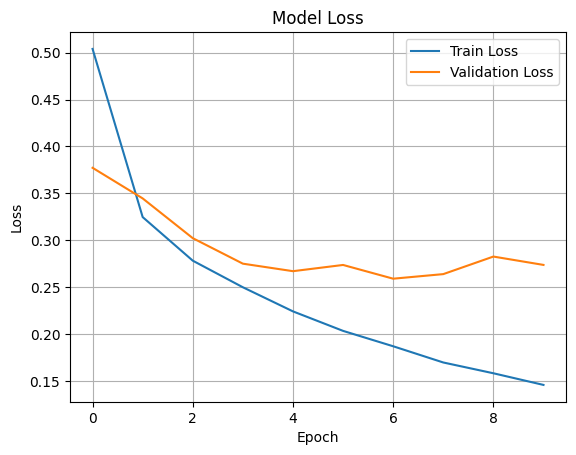

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 2s - 7ms/step - accuracy: 0.9068 - loss: 0.2738

Test accuracy: 0.9068


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


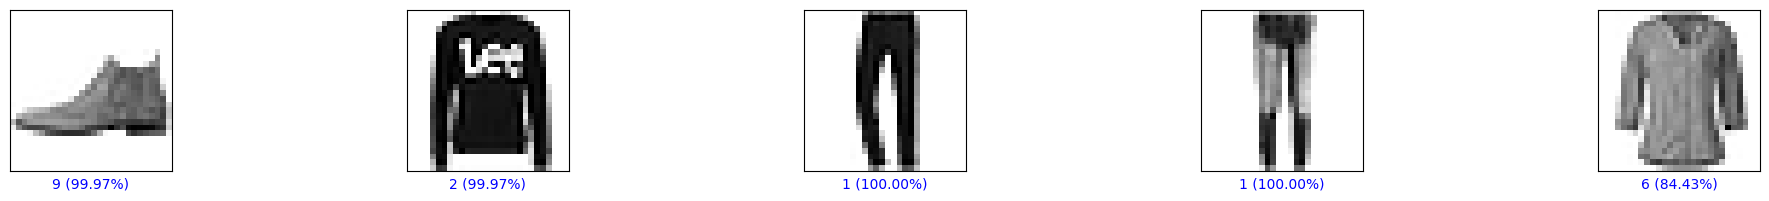

In [21]:
# Predict the labels of the test set
predictions = model.predict(test_images)

# Function to plot images with predicted labels
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):.2f}%)", color=color)

# Plot the first 5 test images with predictions
num_rows = 1
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()

In [22]:
import json

print(json.dumps(history.history, indent=4))

{
    "accuracy": [
        0.8182666897773743,
        0.8806166648864746,
        0.8980500102043152,
        0.9073666930198669,
        0.9169833064079285,
        0.9239000082015991,
        0.9292500019073486,
        0.9369666576385498,
        0.9395166635513306,
        0.9449833035469055
    ],
    "loss": [
        0.5039007067680359,
        0.32477858662605286,
        0.27836382389068604,
        0.25003573298454285,
        0.22434383630752563,
        0.2035820186138153,
        0.18719780445098877,
        0.1699223667383194,
        0.15843740105628967,
        0.14602413773536682
    ],
    "val_accuracy": [
        0.8621000051498413,
        0.8737999796867371,
        0.887499988079071,
        0.8985000252723694,
        0.9068999886512756,
        0.9013000130653381,
        0.9053000211715698,
        0.9057000279426575,
        0.9096999764442444,
        0.9067999720573425
    ],
    "val_loss": [
        0.37727072834968567,
        0.34467339515686035,
    